In [1]:
import pandas
import pyupbit
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 테스트할 코인들
coins = ['KRW-BTC', 'KRW-ETH', 'KRW-XRP', 'KRW-DOGE', 'KRW-ADA', 
'KRW-MATIC', 'KRW-DOT', 'KRW-TRX', 'KRW-SOL', 'KRW-AVAX', 
'KRW-LINK', 'KRW-ATOM', 'KRW-ETC', 'KRW-BCH', 'KRW-XLM']

In [3]:
# Stochastic slow 계산
def calStochastic(df, n, m, t):
    ndays_high = df.high.rolling(window=n, min_periods=1).max()
    ndays_low = df.low.rolling(window=n, min_periods=1).min()
    fast_k = ((df.close - ndays_low) / (ndays_high - ndays_low)) * 100
    slow_k = fast_k.ewm(span=m).mean()
    slow_d = slow_k.ewm(span=t).mean()
    df['slowK'] = slow_k
    df['slowD'] = slow_d
    return df

In [4]:
# 원하는 코인의 stochastic slow 값 가져오기
coin = "KRW-XRP"
df = pyupbit.get_ohlcv(ticker=coin, interval="day")
df = calStochastic(df, 9, 3, 3)
df

,open,high,low,close,volume,value,slowK,slowD
2022-06-04 09:00:00,498.0,501.0,492.0,499.0,1.075897e+08,5.347880e+10,77.777778,77.777778
2022-06-05 09:00:00,499.0,507.0,496.0,502.0,1.363276e+08,6.826218e+10,70.370370,72.839506
2022-06-06 09:00:00,502.0,515.0,501.0,507.0,2.648310e+08,1.346532e+11,67.425811,69.745966
2022-06-07 09:00:00,508.0,526.0,492.0,516.0,3.289118e+08,1.656668e+11,69.112437,69.408084
2022-06-08 09:00:00,515.0,519.0,503.0,511.0,1.880025e+08,9.579881e+10,62.284007,65.731141
...,...,...,...,...,...,...,...,...
2022-12-16 09:00:00,500.0,500.0,462.0,470.0,2.795426e+08,1.349114e+11,19.258474,26.538839
2022-12-17 09:00:00,470.0,475.0,461.0,470.0,1.774060e+08,8.309000e+10,16.660487,21.599663
2022-12-18 09:00:00,471.0,472.0,462.0,465.0,8.975568e+07,4.189644e+10,11.663577,16.631620
2022-12-19 09:00:00,465.0,467.0,440.0,447.0,2.504509e+08,1.127780e+11,10.152776,13.392198


In [5]:
# 매수 조건, 매도 조건
# 교차 지점에서 slow k가 더 크고, 50미만 일 때 매수
# 교차 지점에서 slow d가 더 크면 매도
# if slow_d[-2] > slow_k[-2] and slow_k[-1] > slow_d[-1] and slow_k < 50:
df['buy'] = np.where((df.slowD.shift(2) > df.slowK.shift(2)) & (df.slowK.shift(1) > df.slowD.shift(1)) & (df.slowK.shift(1) < 50), 1, 0)
df['sell'] = np.where((df.slowK.shift(2) > df.slowD.shift(2)) & (df.slowD.shift(1) > df.slowK.shift(1)) & (df.buy.cumsum() > 0), 1, 0)
# df['sell'] = np.where((df.slowK.shift(2) > df.slowD.shift(2)) & (df.slowD.shift(1) > df.slowK.shift(1)) & (df.buy.cumsum() > 0) & (df.slowK.shift(1) > 70), 1, 0)
df

,open,high,low,close,volume,value,slowK,slowD,buy,sell
2022-06-04 09:00:00,498.0,501.0,492.0,499.0,1.075897e+08,5.347880e+10,77.777778,77.777778,0,0
2022-06-05 09:00:00,499.0,507.0,496.0,502.0,1.363276e+08,6.826218e+10,70.370370,72.839506,0,0
2022-06-06 09:00:00,502.0,515.0,501.0,507.0,2.648310e+08,1.346532e+11,67.425811,69.745966,0,0
2022-06-07 09:00:00,508.0,526.0,492.0,516.0,3.289118e+08,1.656668e+11,69.112437,69.408084,0,0
2022-06-08 09:00:00,515.0,519.0,503.0,511.0,1.880025e+08,9.579881e+10,62.284007,65.731141,0,0
...,...,...,...,...,...,...,...,...,...,...
2022-12-16 09:00:00,500.0,500.0,462.0,470.0,2.795426e+08,1.349114e+11,19.258474,26.538839,0,0
2022-12-17 09:00:00,470.0,475.0,461.0,470.0,1.774060e+08,8.309000e+10,16.660487,21.599663,0,0
2022-12-18 09:00:00,471.0,472.0,462.0,465.0,8.975568e+07,4.189644e+10,11.663577,16.631620,0,0
2022-12-19 09:00:00,465.0,467.0,440.0,447.0,2.504509e+08,1.127780e+11,10.152776,13.392198,0,0


In [6]:
# 수익률 계산
hold = False
profit = 1

buy_signal = []
sell_signal = []

for x in df.iterrows():
    if x[1].buy == 1 and hold == False:
        hold = True
        buy_price = x[1].open
        buy_signal.append(buy_price)
        sell_signal.append(np.nan)
    elif x[1].sell == 1 and hold == True:
        hold = False
        sell_price = x[1].open
        sell_signal.append(sell_price)
        buy_signal.append(np.nan)

        # 수익률 누적 곱으로 총 수익률 계산
        profit *= 1 + (sell_price - buy_price) / buy_price
        print(profit)
    else:
        buy_signal.append(np.nan)
        sell_signal.append(np.nan)

df['buy_price'] = buy_signal
df['sell_price'] = sell_signal

print(f'수익률: {profit}')
# 수수료 빼는 코드 추가하기

0.9736842105263158
1.0563555114200598
1.048968409941598
1.1490972127087504
1.2195492616908936
1.2268374046890465
1.208045584485932
1.2398362577618776
1.1988191184073493
1.2686532418097192
1.225156559233386
1.201320828509001
수익률: 1.201320828509001


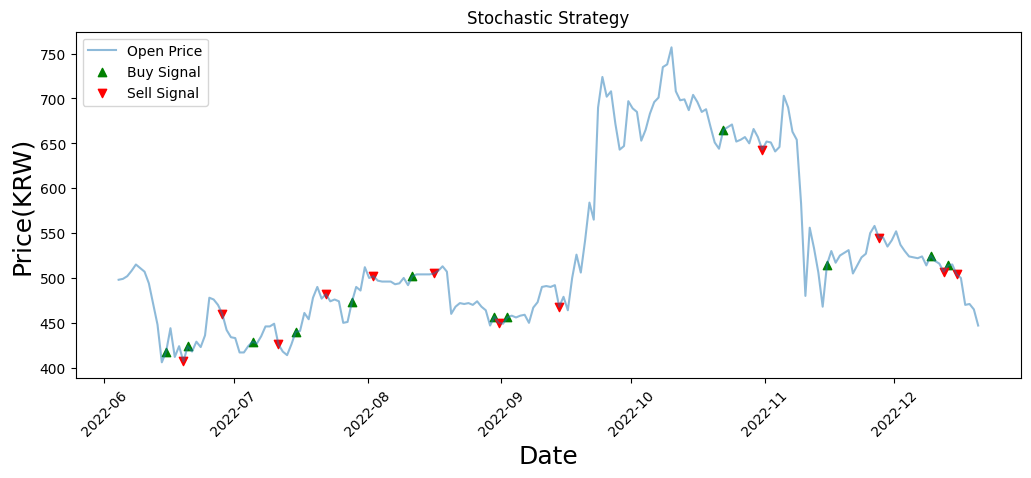

In [7]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, df['open'], alpha=0.5, label='Open Price')
plt.scatter(df.index, df['buy_price'], color='green', label='Buy Signal', marker='^', alpha=1)
plt.scatter(df.index, df['sell_price'], color='red', label='Sell Signal', marker='v', alpha=1)
plt.title('Stochastic Strategy')

plt.xlabel('Date', fontsize=18)
plt.xticks(rotation=45)
plt.ylabel('Price(KRW)', fontsize=18)
plt.legend(loc='upper left')
plt.show()